<a href="https://colab.research.google.com/github/DrMiracle/Colab-Projects/blob/main/data%20analysis/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data generation

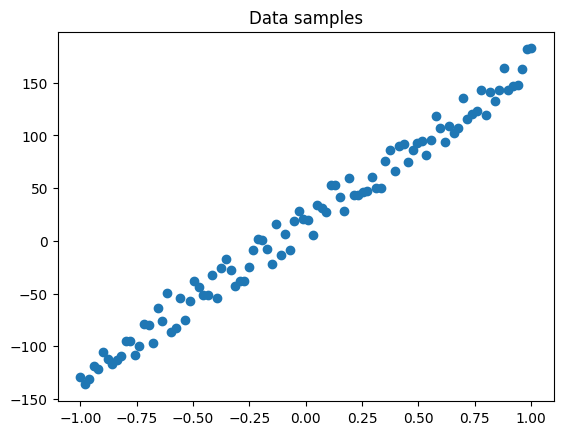

In [ ]:
# generating data samples
x = np.linspace(-5.0, 5.0, 100)[:, np.newaxis]
y = 29 * x + 40 * np.random.rand(100,1)

# normalization of input data
x /= np.max(x)

plt.title('Data samples')
plt.scatter(x, y);

## Sklearn Linear regression

Sklearn MSE:  120.30896381341076


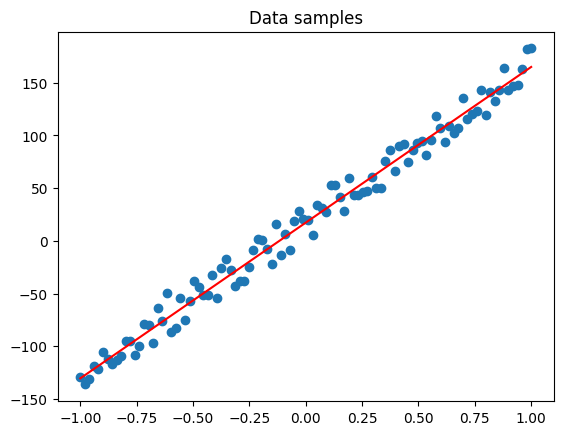

In [ ]:
sklearn_model = LinearRegression()
sklearn_model.fit(x, y)
y_hat_sklearn = sklearn_model.predict(x)

plt.title('Data samples')
plt.scatter(x, y)
plt.plot(x, y_hat_sklearn, color='r');

print('Sklearn MSE: ', mean_squared_error(y, y_hat_sklearn))

## Implementation of Linear Regression from scratch

In [ ]:
class MyLinearRegression:
    def __init__(self, weights_init='random', add_bias = True, learning_rate=1e-5,
        num_iterations=1000, verbose=False, max_error=1e-5):
        ''' Linear regression model using gradient descent

        # Arguments
            weights_init: str
                weights initialization option ['random', 'zeros']
            add_bias: bool
                whether to add bias term
            learning_rate: float
                learning rate value for gradient descent
            num_iterations: int
                maximum number of iterations in gradient descent
            verbose: bool
                enabling verbose output
            max_error: float
                error tolerance term, after reaching which we stop gradient descent iterations
        '''

        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.weights_init = weights_init
        self.add_bias = add_bias
        self.verbose = verbose
        self.max_error = max_error

    def initialize_weights(self, n_features):
        ''' weights initialization function '''
        if self.weights_init == 'random':
            ################

            # YOUR CODE HERE
            weights = np.random.randn(n_features)

            ################
        elif self.weights_init == 'zeros':
            ################

            # YOUR CODE HERE
            weights = np.zeros(n_features)

            ################
        else:
            raise NotImplementedError("Invalid weights")
        return weights

    def cost(self, target, pred):
        ''' calculate cost function

            # Arguments:
                target: np.array
                    array of target floating point numbers
                pred: np.array
                    array of predicted floating points numbers
        '''
        ################

        # YOUR CODE HERE
        error = target - pred
        loss = np.mean(error**2)

        ################
        return loss

    def fit(self, x, y):
        if self.add_bias:
            ################

            # YOUR CODE HERE
            x = np.hstack((np.ones_like(x), x))

            ################

        self.weights = self.initialize_weights(x.shape[1]).reshape((-1,1))
        current_loss = None

        for i in range(self.num_iterations):
            ################

            # YOUR CODE HERE
            # step 1: calculate current_loss value
            predictions = np.dot(x, self.weights)
            current_loss = (1/len(y)) * np.sum((y-predictions)**2)

            # step 2: calculate gradient value
            gradient = -(2.0 / len(y)) * np.dot(x.T, (y - predictions))

            # step 3: update weights using learning rate and gradient value
            self.weights -= self.learning_rate * gradient
            predictions = np.dot(x, self.weights)

            # step 4: calculate new_loss value
            new_loss = self.cost(y, predictions)

            # step 5: if new_loss and current_loss difference is greater than max_error -> break;
            #         if iteration is greater than max_iterations -> break
            if self.verbose and (i % 100 == 0):
                print(f'Iteration {i}, Loss: {new_loss}')

            if current_loss and abs(new_loss - current_loss) < self.max_error:
                break

            current_loss = new_loss

            ################

    def predict(self, x):
        ''' prediction function '''
        ################

        # YOUR CODE HERE
        if self.add_bias:
            x = np.hstack((np.ones((x.shape[0], 1)), x))

        y_hat = np.dot(x, self.weights)

        ################
        return y_hat

Iteration 0, Loss: 7683.834320932492
Iteration 100, Loss: 1992.085895743483
Iteration 200, Loss: 597.310019547537
Iteration 300, Loss: 242.11746679429544
Iteration 400, Loss: 151.4187800224063
Iteration 500, Loss: 128.2544691848273
Iteration 600, Loss: 122.33826214269706
Iteration 700, Loss: 120.82725078288973
Iteration 800, Loss: 120.44133537244248
Iteration 900, Loss: 120.34277178211572
Iteration 1000, Loss: 120.31759843822242
Iteration 1100, Loss: 120.31116911436479
Iteration 1200, Loss: 120.30952705181473
Iteration 1300, Loss: 120.30910766565874
Iteration 1400, Loss: 120.30900055357105
Iteration 1500, Loss: 120.30897319692332
Iteration 1600, Loss: 120.30896620997919
Iteration 1700, Loss: 120.30896442549927
Iteration 1800, Loss: 120.30896396973941
Iteration 1900, Loss: 120.30896385333739
Iteration 2000, Loss: 120.30896382360812
My MSE:  120.30896382066001


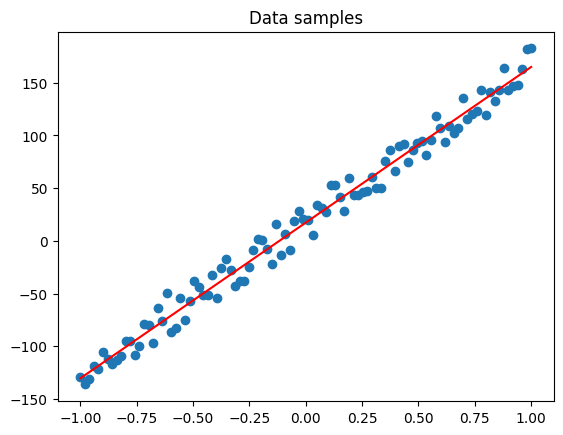

In [ ]:
my_model = MyLinearRegression(verbose=True, learning_rate=0.01, max_error=1e-10, num_iterations=10000)
my_model.fit(x, y)
y_hat = my_model.predict(x)

plt.title('Data samples')
plt.scatter(x, y)
plt.plot(x, y_hat, color='r');

print('My MSE: ', mean_squared_error(y, y_hat))